# Graph of actors

In [57]:
import networkx as nx
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

## Load preprocessed data

In [74]:
df_movies = pd.read_pickle('../data/generated/preprocessed/movies.pkl')

In [92]:
df_movies['principal_genre']= df_movies['movie_genres'].str.split(',', 1, expand=True)[0]
df_movies

,wiki_id,fb_id,movie_name,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_release_year,principal genre,principal_genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller,Science Fiction,Horror,Adventure,Supe...",2001,Thriller,Thriller
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"Mystery,Biographical film,Drama,Crime Drama",2000,Mystery,Mystery
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"Crime Fiction,Drama",1988,Crime Fiction,Crime Fiction
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"Thriller,Erotic thriller,Psychological thriller",1987,Thriller,Thriller
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,Drama,1983,Drama,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,English Language,United States of America,Drama,2011,Drama,Drama
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,English Language,"Ireland,United Kingdom","Biographical film,Drama,Documentary",2011,Biographical film,Biographical film
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,English Language,United States of America,"Satire,Comedy",1972,Satire,Satire
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,Japanese Language,Japan,"Science Fiction,Japanese Movies,Adventure,Anim...",1992,Science Fiction,Science Fiction


In [76]:
df_actors = pd.read_pickle('../data/generated/preprocessed/characters.pkl')


In [77]:
df_actors

,wiki_id,fb_movie_id,release,character_name,actor_birth,actor_gender,actor_height,ethnicity,actor_name,actor_age,fb_char_id,fb_actor_id,actor_nationality
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/03wcfv7,United States of America
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,NaN,Natasha Henstridge,27.0,/m/0jys3m,/m/0346l4,Canada
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,NaN,Ice Cube,32.0,/m/0jys3g,/m/01vw26l,NaN
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/034hyc,United Kingdom
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/01y9xg,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0b_vcv,NaN
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0bx7_j,NaN
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,English people,David Hemmings,15.0,/m/0g8ngmc,/m/022g44,England
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,/m/0g8ngmm,NaN


In [94]:
merge_info = pd.merge(df_actors, df_movies, on=["wiki_id"])
#merge_info_W= merge_info[merge_info['actor_gender']==]

merge_info['principal_genre'].replace('', np.nan, inplace=True)
merge_info = merge_info.dropna(subset='principal_genre')

merge_info.groupby(merge_info['principal_genre']).apply(lambda x: pd.Series({
        'average_women': len(x[x['actor_gender'] == 'F']),
        'average_men': len(x[x['actor_gender'] == 'M'])
        }))

,average_women,average_men
principal_genre,,
Absurdism,31,57
Action,2390,6633
Action Comedy,9,26
Action Thrillers,57,261
Action/Adventure,2669,9760
...,...,...
Women in prison films,0,1
Workplace Comedy,73,117
World cinema,1808,3434


In [79]:
merge_info = pd.merge(df_actors, df_movies, on=["wiki_id"])
#df_actors['local_actor']= merge_info['actor_nationality']==merge_info['movie_countries']
df_actors['local_actor']= merge_info.apply(lambda x: x.movie_countries.find(str(x.actor_nationality)), axis=1).apply(lambda x: False if x < 0 else True)
df_actors[df_actors.actor_nationality.isnull() == False]

groupby =df_actors.groupby('wiki_id')['local_actor'].agg(['mean'])
df_actors['local_rate']= df_actors['wiki_id'].apply(lambda x: groupby.loc[x]['mean'])
df_actors


,wiki_id,fb_movie_id,release,character_name,actor_birth,actor_gender,actor_height,ethnicity,actor_name,actor_age,fb_char_id,fb_actor_id,actor_nationality,local_actor,local_rate
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/03wcfv7,United States of America,True,0.470588
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,NaN,Natasha Henstridge,27.0,/m/0jys3m,/m/0346l4,Canada,False,0.470588
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,NaN,Ice Cube,32.0,/m/0jys3g,/m/01vw26l,NaN,False,0.470588
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/034hyc,United Kingdom,False,0.470588
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/01y9xg,United States of America,True,0.470588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0b_vcv,NaN,False,0.133333
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0bx7_j,NaN,False,0.133333
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,English people,David Hemmings,15.0,/m/0g8ngmc,/m/022g44,England,False,0.000000
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,/m/0g8ngmm,NaN,False,0.000000


In [80]:
rate_table = pd.merge(df_movies[['wiki_id','movie_release_year']], df_actors[['wiki_id','local_rate']].drop_duplicates(subset=['wiki_id']) , on='wiki_id')


In [81]:
stats_by_year = rate_table.groupby(rate_table['movie_release_year']).apply(lambda x: pd.Series({
        'average_local_rate': x['local_rate'].mean(),
        'std_dev_local_rate': x['local_rate'].std()
    }))
stats_by_year = stats_by_year[stats_by_year.std_dev_local_rate.isnull() == False]
stats_by_year = stats_by_year[stats_by_year.index > 1915]
stats_by_year = stats_by_year[stats_by_year.index < 2013]
stats_by_year

,average_local_rate,std_dev_local_rate
movie_release_year,,
1916,0.664815,0.411289
1917,0.660526,0.422691
1918,0.634268,0.429203
1919,0.681595,0.410156
1920,0.589486,0.439090
...,...,...
2008,0.480392,0.323168
2009,0.481121,0.324440
2010,0.426409,0.329548


Text(0, 0.5, 'Local Actor Rate')

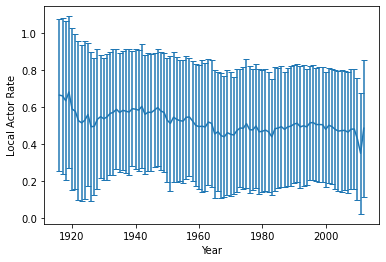

In [82]:
plt.errorbar(stats_by_year.index, stats_by_year.average_local_rate,
             yerr = stats_by_year.std_dev_local_rate,
             capsize= 3)
plt.xlabel('Year')
plt.ylabel('Local Actor Rate')

Text(0, 0.5, 'Local Actor Rate')

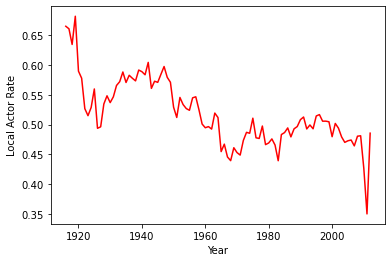

In [87]:
#plt.fill_between(stats_by_year.index, stats_by_year.average_local_rate - stats_by_year.std_dev_local_rate,
#                stats_by_year.average_local_rate + stats_by_year.std_dev_local_rate, alpha = 0.5, color = 'orange')
plt.plot(stats_by_year.average_local_rate, color = 'red')

plt.xlabel('Year')
plt.ylabel('Local Actor Rate')

In [86]:
df_actors.dropna(subset='ethnicity')['ethnicity'].unique()

array(['Omaha people', 'Indian Americans', 'Italians', 'German Americans',
       'Ezhava', 'Malayali', 'Armenians', 'Marathi people',
       'Lithuanian American', 'Italian Americans', 'Danish Americans',
       'Scottish American', 'English people', 'Irish people',
       'European Americans', 'Russian Americans', 'Gujarati people',
       'Spanish American', 'Bihari people', 'Nair', 'Cuban American',
       'Canadian Americans', 'Russians', 'Yoruba people',
       'Japanese people', 'Scandinavian Americans', 'Filipino Americans',
       'Swedish Americans', 'Finnish Americans', 'Koreans',
       'Welsh people', 'white Americans', 'Bengali people',
       'Iranian people', 'Dutch American', 'Hungarian Americans',
       'Gaud Saraswat Brahmin', 'Bunt', 'Afghans in India',
       'Hispanic and Latino Americans', 'Swedes', 'Sindhis', 'Tamil',
       'Italian Canadians', 'Guyanese American', 'Japanese American',
       'Punjabis', 'Bengali Hindus', 'Kanyakubja Brahmins',
       'White B

In [72]:
df_movies.sample(10)

,wiki_id,fb_id,movie_name,movie_release,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_release_year
23376,1845248,/m/060hyr,The Crossing,2000-01-10,NaN,100.0,English Language,United States of America,Thriller,2000
53279,3572522,/m/09md4h,The Magnificent Seven Deadly Sins,1971,NaN,107.0,English Language,United States of America,Thriller,1971
76998,19757771,/m/04q2pmc,Bubbling Troubles,1940-05-25,NaN,10.0,English Language,United States of America,Thriller,1940
22115,19419795,/m/04n373m,The Bad Lord Byron,1949,NaN,85.0,English Language,United States of America,Thriller,1949
26769,33622349,/m/0hglq6g,The Mad Songs of Fernanda Hussein,2001,NaN,168.0,English Language,United States of America,Thriller,2001
14786,2599640,/m/07qtt0,Rockin' in the Rockies,1945,NaN,63.0,English Language,United States of America,Thriller,1945
20225,24061603,/m/07k4dv1,Fierrot le pou,1990,NaN,8.0,English Language,United States of America,Thriller,1990
26071,2743891,/m/080cw8,License to Drive,1988,22433275.0,90.0,English Language,United States of America,Thriller,1988
79454,26693888,/m/0bmjf1v,Shalabam,2008-03-11,NaN,NaN,English Language,United States of America,Thriller,2008
3766,28766998,/m/0ddd_wc,Suspense Account,NaN,NaN,NaN,English Language,United States of America,Thriller,<NA>
